 $$H=
 \begin{pmatrix}
h\omega & g & g \\
g 	& h\omega & dd \\
g & dd & h\omega
\end{pmatrix}
$$ 

In [1]:
from math import *
import numpy as np
import numpy.linalg as linalg 
hw=1
g=0.01
dd=0.02
H=np.zeros((3,3))

H[0,0] =hw
H[1,1]=hw
H[2,2]=hw
H[0,1] =g
H[0,2] =g
H[1,0] =g
H[1,2] =dd
H[2,0] =g
H[2,1] =dd

def eigensolver(H):
    e,v=linalg.eig(H)
    idx=e.argsort()[::1]
    e=e[idx]
    v=v[:,idx]
    return e,v
E,v=eigensolver(H)
print('Energies:')
print(E)
print('Vectors (column-wise):')
print(v)

Energies:
[0.98       0.99267949 1.02732051]
Vectors (column-wise):
[[ 7.73481406e-15 -8.88073834e-01  4.59700843e-01]
 [-7.07106781e-01  3.25057584e-01  6.27963030e-01]
 [ 7.07106781e-01  3.25057584e-01  6.27963030e-01]]


теперь необходимо найти коэффициенты 
$λ_{j}$
для заданных заселенностей базисных векторов в момент времени t=0

In [2]:
def calc_lambda(b, v):
    psi_0 = np.array(b)
    lam = linalg.solve(v, psi_0)
    return lam

# calculates Psi(t) -- in term of basis states
def psi_t(t, basis_dim, lam, E, C):
    psi = np.zeros((basis_dim), dtype=np.cdouble)
    
    for alpha in range(0,basis_dim):
        coef_nm_re = 0.0
        coef_nm_im = 0.0
        for j in range(0,basis_dim):
            coef_nm_re += lam[j] * C[alpha,j] * cos(E[j]*t)
            coef_nm_im += - lam[j] * C[alpha,j] * sin(E[j]*t)
        psi[alpha] = coef_nm_re + coef_nm_im * 1j

    return psi

lam = calc_lambda([1,0,0], v)
print('lambda = ', lam)
print('Psi(0) = ', psi_t(0, 3, lam, E, v))

lambda =  [-7.85046229e-17 -8.88073834e-01  4.59700843e-01]
Psi(0) =  [ 1.00000000e+00+0.j  0.00000000e+00+0.j -1.11022302e-16+0.j]


вычисляем на сетке волновую функцию 
$|\psi(t)>$
 и строим графики всех заселенностей.

In [3]:
t = np.linspace(0, 1000, 100)
psi = np.zeros((len(t), 3), dtype=np.cdouble)
for i,ti in enumerate(t):
    psi[i,:] = psi_t(ti, 3, lam, E, v)

n_1_00 = abs(psi[:,0])**2
n_0_10 = abs(psi[:,1])**2
n_0_01 = abs(psi[:,2])**2

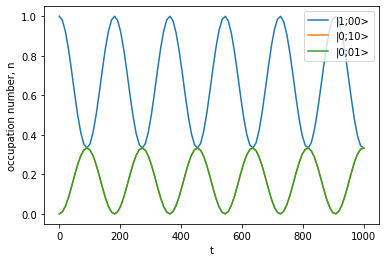

In [4]:
import matplotlib.pyplot as plt

plt.plot(t, n_1_00, label='|1;00>')
plt.plot(t, n_0_10, label='|0;10>')
plt.plot(t, n_0_01, label='|0;01>')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('occupation number, n')
plt.show()

lambda =  [-0.70710678  0.32505758  0.62796303]
Psi(0) =  [-5.55111512e-17+0.j  1.00000000e+00+0.j -5.55111512e-17+0.j]


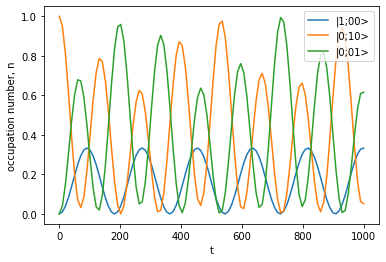

In [5]:
def plot_dynamics(dim, init_occupations, energies, eigvecs, bas_fun_labels, tmax, dt):
    lam = calc_lambda(init_occupations, eigvecs)
    print('lambda = ', lam)
    print('Psi(0) = ', psi_t(0, dim, lam, energies, eigvecs))

    t = np.linspace(0, tmax, int(tmax/dt))
    psi = np.zeros((len(t), dim), dtype=np.cdouble)
    for i,ti in enumerate(t):
        psi[i,:] = psi_t(ti, dim, lam, energies, eigvecs)

    for i in range(0,dim):
        n_i = abs(psi[:,i])**2
        plt.plot(t, n_i, label=bas_fun_labels[i])

    plt.legend(loc='upper right')
    plt.xlabel('t')
    plt.ylabel('occupation number, n')
    plt.show()

basis_functions = ['|1;00>', '|0;10>', '|0;01>']
plot_dynamics(3, [0,1,0], E, v, basis_functions, 1000, 10)

Случай произвольного n≥2 Здесь приходится работать с базисными векторами |n;00>, |n−1;10>, |n−1;01>, |n−2;11>. Матрица гамильтониана в общем виде:
  $$\begin{pmatrix}
h\omega n& g\sqrt{n}&  g\sqrt{n}&dd\\
g\sqrt{n}& h\omega n& dd&g\sqrt{n-1}\\
g\sqrt{n}& dd& h\omega n&g\sqrt{n-1}\\
dd&g\sqrt{n-1}&g\sqrt{n-1}&h\omega n
\end{pmatrix}$$

In [6]:
g=0.01
n=1
dd=0.05
H = np.zeros((4,4))
H[0,0] = n
H[1,1] = n
H[2,2] = n
H[3,3] = n
H[0,1] = g*sqrt(n)
H[0,2] = g*sqrt(n)
H[0,3]=dd
H[1,2]=dd
H[2,1]=dd
H[3,0]=dd
H[1,0] = g*sqrt(n)
H[2,0] = g*sqrt(n)
H[1,3] = g*sqrt(n-1)
H[2,3] = g*sqrt(n-1)
H[3,1] = g*sqrt(n-1)
H[3,2] = g*sqrt(n-1)
E, v = eigensolver(H)
print('Energies:')
print(E)
print('Vectors (column-wise):')
print(v)

Energies:
[0.9490001  0.95       1.04053702 1.06046288]
Vectors (column-wise):
[[ 7.10529396e-01 -1.98451015e-14  4.58599064e-01  5.33699237e-01]
 [-7.03495135e-02 -7.07106781e-01 -4.84624479e-01  5.10088287e-01]
 [-7.03495135e-02  7.07106781e-01 -4.84624479e-01  5.10088287e-01]
 [-6.96598786e-01  1.93862899e-14  5.65654601e-01  4.41344541e-01]]


lambda =  [7.10529396e-01 1.05510213e-13 4.58599064e-01 5.33699237e-01]
Psi(0) =  [ 1.00000000e+00+0.j  0.00000000e+00+0.j -1.11022302e-16+0.j
 -1.94289029e-16+0.j]


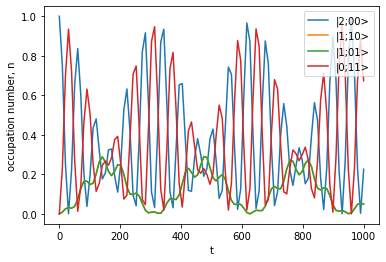

In [7]:
basis_functions = ['|2;00>', '|1;10>', '|1;01>', '|0;11>']
plot_dynamics(4, [1,0,0,0], E, v, basis_functions, 1000, 10)

lambda =  [-0.07034951 -0.70710678 -0.48462448  0.51008829]
Psi(0) =  [0.00000000e+00+0.j 1.00000000e+00+0.j 1.11022302e-16+0.j
 0.00000000e+00+0.j]


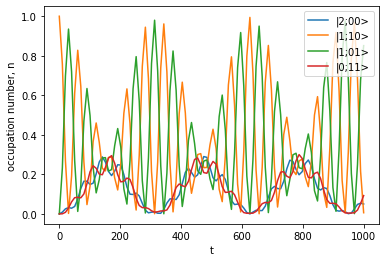

In [8]:
plot_dynamics(4, [0,1,0,0], E, v, basis_functions, 1000, 10)

lambda =  [-6.96598786e-01 -1.00956945e-13  5.65654601e-01  4.41344541e-01]
Psi(0) =  [8.32667268e-17+0.j 2.77555756e-17+0.j 1.11022302e-16+0.j
 1.00000000e+00+0.j]


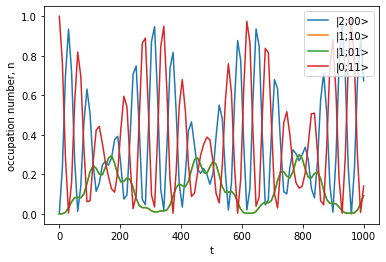

In [9]:
plot_dynamics(4, [0,0,0,1], E, v, basis_functions, 1000, 10)